# Mesh visualisation

We are now going to have a look at different mesh visualisation options. We are going to use the following mesh:

In [1]:
import discretisedfield as df

p1 = (0, 0, 0)
p2 = (100e-9, 50e-9, 20e-9)
n = (20, 10, 4)

region = df.Region(p1=p1, p2=p2)
mesh = df.Mesh(region=region, n=n)

Same as the region object, there are two main ways how we can visualise mesh in `discretisedfield`:

1. Using `matplotlib` (static 2D plots, usually with some tricks to make them look 3D)
2. Using `k3d` (interactive 3D plots)

All `matplotlib` method names start with `mpl`, whereas all `k3d` plots start with `k3d`. We will first have a look at simple plotting using both `matplotlib` and `k3d` and later look at how we can pass different parameters to change them.

## Basic plotting

To get a quick `matploltlib` "3D" plot of the mesh, we call `mpl`:

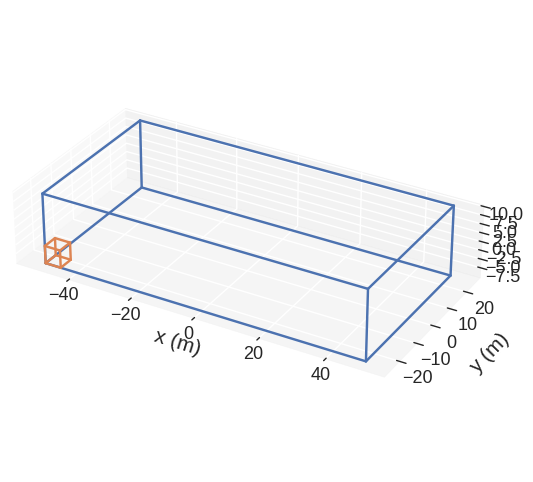

In [2]:
mesh.mpl()

`mpl` plots two cubic regions. The larger one corresponds to the region and the smaller one to the discretisation cell. Without passing any parameters to `mpl` function, some default settings are chosen. We can see that `matplotlib` is not good in showing the right proportions of the region. More precisely, we know that the region is much thinner in the z-direction, but that is not the impression we get from the plot. This is the main disadvatage of `mpl`.

Now, we can ask our region object for an interactive `k3d` plot:

In [3]:
mesh.k3d()

Output()

Similar to the `mpl` plot, we can see the region as well as the discretisation cell in this plot. This can be useful to get an impression of the discretisation cell size with respect to the region we discretise. `k3d` plot is an interactive plot, which we can zoom, rotate, etc. In addition, a small contol panel is shown in the top-right corner, where we can modify some of the plot's properties.

## Advanced plotting

Here we explore what parameters we can pass to `mpl` and `k3d` functions. Let us start with `mpl`.

### `mpl`

The default plot is:

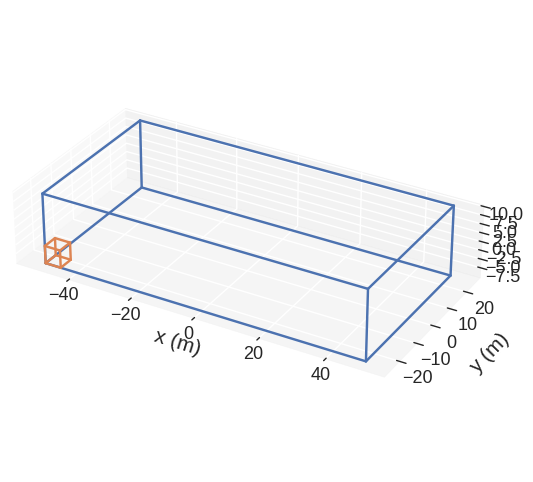

In [4]:
mesh.mpl()

If we want to change the figure size, we can pass `figsize` parameter. Its value must be a lenth-2 tuple, with the first element being the size in the horizontal direction, whereas the second element is the size in the vertical direction.

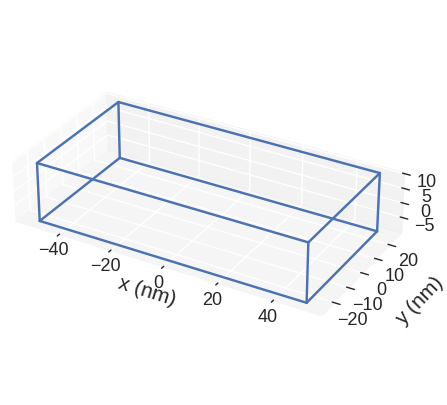

In [5]:
region.mpl(figsize=(10, 5))

The color of the lines depicting the region and the discretisation cell we can choose by passing `color` argument. `color` must be a lenght-2 tuple which consists of valid `matplotlib` colours. For instance, it can be a pair of RGB hex-strings ([online converter](http://www.javascripter.net/faq/rgbtohex.htm)). The first element is `color` is the colour of the region, whereas the second element is the colour of the discretisation cell.

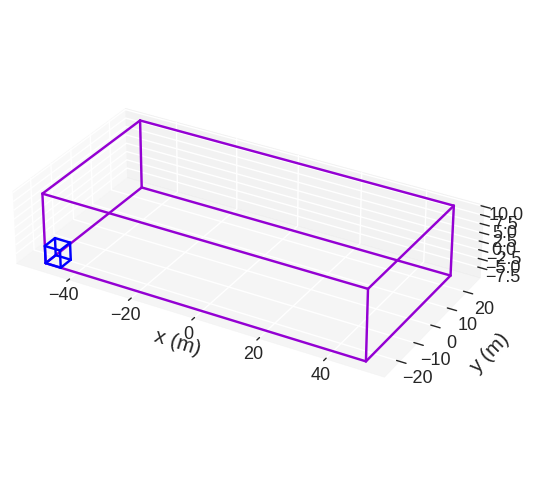

In [6]:
mesh.mpl(color=("#9400D3", "#0000FF"))

`discretisedfield` automatically chooses the SI prefix (nano, micro, etc.) it is going to use to divide the axes with and show those units on the axes. Sometimes (e.g. for thin films), `discretisedfield` does not choose the SI prefix we expected. In those cases, we can explicitly pass it using `multiplier` argument. ``multiplier`` can be passed as $10^{n}$, where $n$ is a multiple of 3 (..., -6, -3, 0, 3, 6,...). For instance, if `multiplier=1e-6` is passed, all axes will be divided by $1\,\mu\text{m}$ and $\mu\text{m}$ units will be used as axis labels.

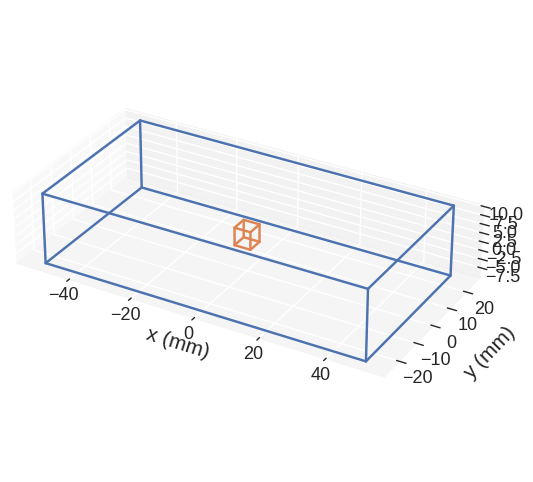

In [7]:
mesh.mpl(multiplier=1e-6)

If we want to save the plot, we pass `filename`, mesh plot is going to be shown and the plot saved in our working directory as a PDF.

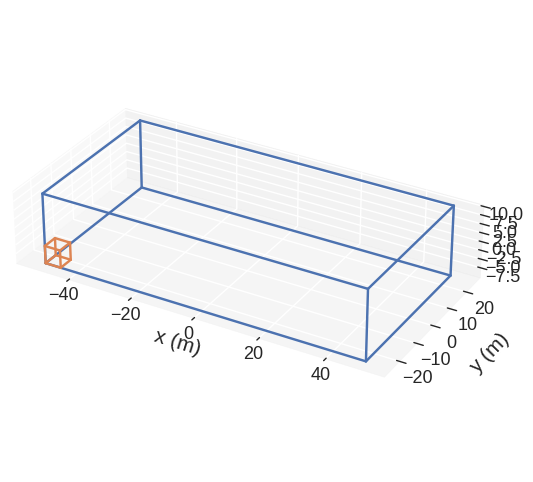

In [8]:
mesh.mpl(filename="my-mesh-plot.pdf")

`mpl` mesh plot is based on [`matplotlib.pyplot.plot` function](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html). Therefore, any parameter accepted by it can be passed. For instance:

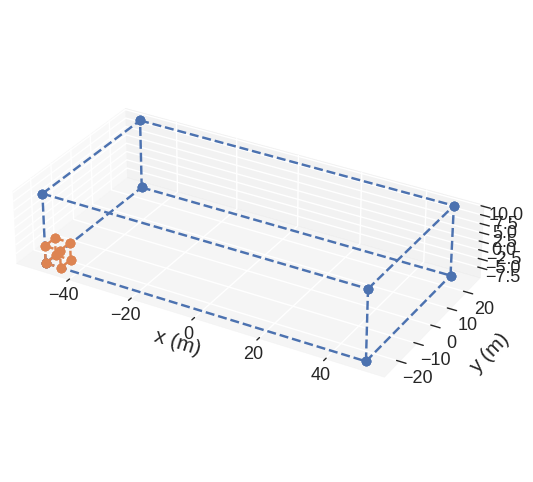

In [9]:
mesh.mpl(marker="o", linestyle="dashed")

Finally, we show how to expose the axes on which the mesh is plotted, so that we can customise them. We do that by creating the axes ourselves and then passing them to `mpl` function.

Text(0.5, 0, 'height')

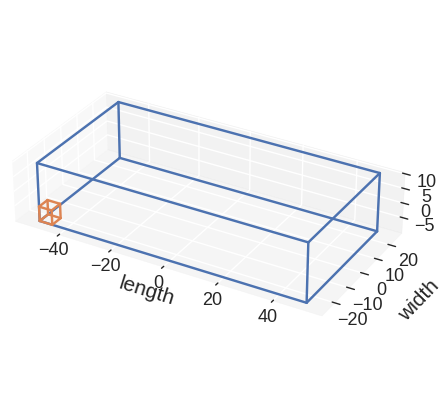

In [10]:
import matplotlib.pyplot as plt

# Create the axes
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111, projection="3d")

# Add the region to the axes
mesh.mpl(ax=ax)

# Customise the axes
ax.set_xlabel("length")
ax.set_ylabel("width")
ax.set_zlabel("height")

This way, by exposing the axes and passing any allowed `matplotlib.pyplot.plot` argument, we can customise the plot any way we like (as long as it is allowed by `matplotlib`).

### `k3d`

Default k3d plot is:

In [11]:
mesh.k3d()

Output()

If we want to change the color, we can pass `color` argument. It is a length-2 tuple of integer colours. The first number in the tuple is the colour of the region, whereas the second colour is the colour of the discretisation cell.

In [12]:
mesh.k3d(color=(754321, 123456))

Output()

Similar to the `mpl` plot, we can change the axes multiplier.

In [13]:
mesh.k3d(multiplier=1e-6)

Output()

`k3d` plot is based on [k3d.voxels](https://k3d-jupyter.org/k3d.html#k3d.factory.voxels), so any parameter accepted by it can be passed. For instance:

In [14]:
mesh.k3d(opacity=0.2)

Output()

We can also expose `k3d.Plot` object and customise it.

In [15]:
import k3d

# Expose plot object
plot = k3d.plot()
plot.display()

# Add region to the plot
mesh.k3d(plot=plot)

# Customise the plot
plot.axes = [r"\text{length}", r"\text{width}", r"\text{height}"]

Output()

This way, we can modify the plot however we want (as long as `k3d` allows it).